In [224]:
import os
from PIL import Image
from skimage import color,io 
import skimage.filters as sf
from skimage.filters import median
from skimage import data
import cv2
import matplotlib.pyplot as plt

In [184]:
pwd

'C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection'

In [185]:
path1 = "C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection\\final code"
path2 = "C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection\\enhance data"

In [186]:
try: 
    os.mkdir(path2) 
except OSError as error: 
    print(error)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Pallavi\\Desktop\\Forest_Fire_Detection\\enhance data'


In [187]:
listing=os.listdir(path1)
#num_samples=size(listing)

In [188]:
# listing

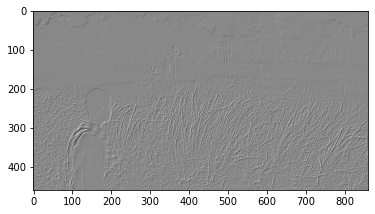

In [189]:
i = 0
for file in listing:
    if i == 2:
        break
    i+= 1
    if not os.path.isdir(path1+ '\\' + file):
        im=Image.open(path1+'\\'+file).convert('L')
#         rgb_im = im.convert('RGB')
#         plt.imshow(rgb_im)

        image_enhance = im.copy()
        image = io.imread(path1+'\\'+ file,as_gray=True)
        after_filter = sf.roberts_pos_diag(image)
        filter_pic = plt.imshow(after_filter, cmap='gray')
        plt.savefig(path2+ '\\' + file)
#         result = cv2.imwrite(path2 + '\\' + str(i) +".jpg",edge_roberts)
#         print(result)
        

In [ ]:
Image.open().convert

In [200]:
plt.savefig?

In [201]:
import skimage.filters as sf

In [202]:
import PIL.ImageFilter as pi


In [195]:
pi.Filter?

In [203]:
from PIL import Image
import numpy as np

In [204]:
img = Image.open(path1+"\\fire.1.png").convert('L')


In [205]:
img.size

(860, 460)

In [206]:
img.show()

In [207]:
fil = np.random.randint(-1, 1, size=(3, 3))

fil

In [208]:
# Sharpen
# fil = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# # Box blur
# fil = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Gaussian blur 3X3
fil = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

In [166]:
# Box blur
fil = fil*(1/9)

In [174]:
# Gaussian blur 3X3
fil = fil*(1/16)

In [160]:
fil

array([[ 0.        , -0.11111111,  0.        ],
       [-0.11111111,  0.55555556, -0.11111111],
       [ 0.        , -0.11111111,  0.        ]])

In [142]:
arr = np.asarray(img)

In [143]:
arr

array([[208, 207, 206, ..., 165, 166, 166],
       [208, 208, 208, ..., 164, 164, 164],
       [209, 209, 209, ..., 163, 163, 163],
       ...,
       [ 56,  48,  45, ...,  86,  75,  67],
       [ 54,  57,  49, ...,  55,  50,  48],
       [ 54,  58,  31, ...,  58,  56,  58]], dtype=uint8)

In [144]:
new_shape = (arr.shape[0] - fil.shape[0], arr.shape[1] - fil.shape[1])

In [145]:
new_shape

(457, 857)

In [146]:
newarr = np.random.randint(0, 255, size=new_shape)

In [147]:
newarr[0][0] = 0

In [148]:
newarr

array([[  0, 111, 239, ...,  26,  86,  65],
       [199, 222,  70, ...,   5, 208,  91],
       [200,  97, 243, ..., 124,  40, 114],
       ...,
       [ 78,  87, 239, ..., 215, 150, 226],
       [159,  86, 211, ..., 132, 220, 130],
       [127, 126, 110, ..., 211,  65, 212]])

In [175]:
def convolve(arr, fil, r, c):
    sum = 0 
    for i in range(fil.shape[0]):
        for j in range(fil.shape[1]):
            sum += arr[r+i][c+j]*fil[i][j]
    return sum

In [176]:
for i in range(0, new_shape[0]):
    for j in range(0, new_shape[1]):
        newarr[i][j] = convolve(arr, fil, i, j)
        

In [169]:
newarr

array([[208, 207, 207, ..., 164, 164, 164],
       [208, 208, 209, ..., 164, 164, 163],
       [208, 208, 209, ..., 164, 164, 163],
       ...,
       [ 52,  53,  59, ...,  79,  81,  80],
       [ 47,  47,  55, ...,  87,  90,  87],
       [ 49,  48,  54, ...,  87,  86,  80]])

In [177]:
newImg = Image.fromarray(newarr)


In [178]:
newImg.show()


In [236]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [237]:
image = imread(path1+"\\fire.1.png",as_gray=True)

image_median = median(image)

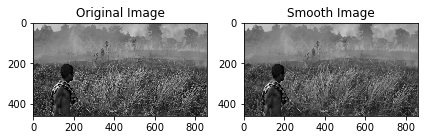

In [239]:
# plotting images
plt.subplot(121), imshow(image)
plt.title('Original Image')

plt.subplot(122),imshow(image_median)
plt.title('Smooth Image')

plt.show()